# Problem 1: Linear Regression on a Simple Dataset

In this problem, you will implemetn a multiple linear regression model from scratch. Please download the **Concrete Strength regression** dataset from https://www.kaggle.com/datasets/maajdl/yeh-concret-data.

A multiple linear regression model takes the form:

$$
Y = X \hat{\beta} + \hat{\epsilon} \text{ where } \hat{\epsilon} \sim \mathcal{N}(0, \hat{\sigma} I)
$$

Here, $X \in \mathbb{R}^{N \times m}$ where each column represents an independent variable, and $Y \in \mathbb{R}^{N \times 1}$ represents the dependent variable to be predicted. We assume that our model minimizes the MSE loss (i.e. $\hat{\beta}_{opt} = \argmin_{\hat{\beta}} \| Y - X \hat{\beta} \|_{2}^{2}$).

Given the dataset, "concrete compressive strength" is the variable to be predicted.

### Problem 1

1. Using all independent variables plus a bias term, find a $\hat{\beta_0} \in \mathbb{R}^{9 \times 1}$ such that $\| Y - X \hat{\beta_0} \|_2$ is minimized. You may only use matrix operations (e.g., multiplication, decomposition, inverse) to find $\beta_{0}$. **You are not allowed to use any statistical libraries.**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv("./data/Concrete_Data_Yeh.csv")
print(data.shape)

# Check if there are any null values in the dataset
print(data.isnull().sum())

(1030, 9)
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


So The concrete strength dataset has 1030 datapoints, 8 features, and 1 target variable. Which means that the design matrix X has shape (1030, 8), Output Vector Y is (1030, 1), so the bias has shape (1030, 1), and the weight matrix $\hat{\beta}$ has dimensions (8, 1), one for each feature.

If we include the bias term inside the weight matrix however, so the model is more like

$$
Y = X \hat{\beta}
$$

Now since the first column of $\hat{\beta}$ represents the bias, and all the rest columns represents the coefficients/weights for the features. $X$ has shape (1030, 9) and $\hat{\beta}$ has shape (9, 1).

Here we use the normal equations to solve the problem. We derived it in class but let's derive it again here.

So the MSE error function can be written as

$$
E = \frac{1}{2} \sum_{i=1}^{N} (x_i \hat{\beta} - y_i )^2
$$

Notice this is just the L2-Norm, and if we write this in dot product form:

$$
E = \frac{1}{2} (X\hat{\beta} - Y)^{T}(X\hat{\beta} - Y)
$$

To minimize this we have to take $\frac{\partial E}{\partial \hat{\beta}} = 0$, using the product rule, we have

$$
\frac{\partial E}{\partial \hat{\beta}} = X^T (X\hat{\beta} - Y) = 0
$$

$$
X^T X\hat{\beta} - X^T Y = 0
$$

$$
X^T X\hat{\beta} = X^T Y
$$

$$
\boxed{\hat{\beta} = (X^T X)^{-1} X^T Y}
$$

In [32]:
feature_cols = ['cement', 'slag', 'flyash', 'water', 
                'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
X = data[feature_cols].to_numpy()
X = np.hstack([
    np.ones((1030, 1)), 
    X
])
Y = data['csMPa'].to_numpy()
Y = np.reshape(Y, (1030, 1))

In [33]:
print(X.shape)
print(Y.shape)

(1030, 9)
(1030, 1)


In [34]:
# Calculate optimal beta
XTX = X.T @ X
XTX_inv = np.linalg.inv(XTX) 
XTX_invX = XTX_inv @ X.T
beta0 = XTX_invX @ Y

In [35]:
print(beta0)
print(beta0.shape)

[[-2.33312136e+01]
 [ 1.19804334e-01]
 [ 1.03865809e-01]
 [ 8.79343215e-02]
 [-1.49918419e-01]
 [ 2.92224595e-01]
 [ 1.80862148e-02]
 [ 2.01903511e-02]
 [ 1.14222068e-01]]
(9, 1)


In [36]:
# Make predictions
Y_pred = X @ beta0

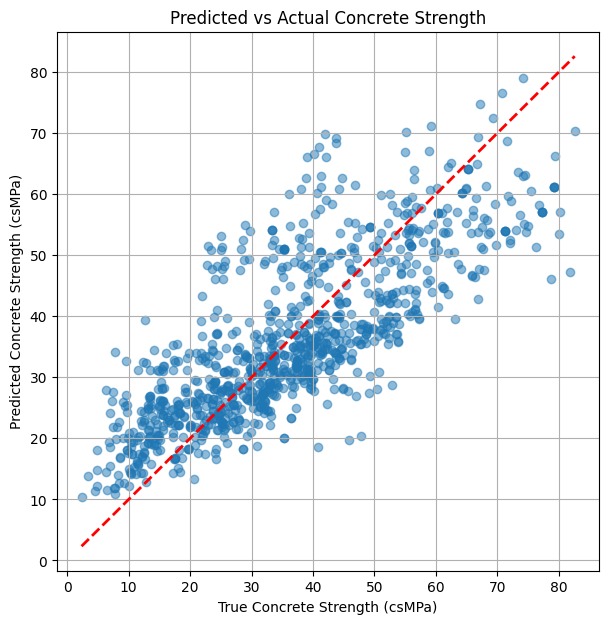

In [37]:
# Y_pred and Y are both (N, 1) arrays
plt.figure(figsize=(7, 7))
plt.scatter(Y, Y_pred, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)  # y = x line
plt.xlabel("True Concrete Strength (csMPa)")
plt.ylabel("Predicted Concrete Strength (csMPa)")
plt.title("Predicted vs Actual Concrete Strength")
plt.grid(True)
plt.show()

In [38]:
# Mean Squared Error
MSE = np.square(np.subtract(Y,Y_pred)).mean()
print(MSE)

107.19723607486019


### Problem 2

2. Randomly splot the dataset into training set (80%) and a validation set (20%). Use the training set to build models with $\beta \in \mathbb{R}^{i \times 1}$ for each $i \in \{ 7, 8, 9\}$. Then, compute the MSE loss of your prediction on the validation set for each model.

What do you observe from the results of your three models? Do models with more independent variables always perform better? You may use any combination of independent variables of your choive.

In [54]:
# Get the indices array
N = X.shape[0]
indices = np.arange(N)
np.random.seed(11)
np.random.shuffle(indices)

# Split indices for 80-20 train-validation split
train_size = int(0.8 * N)
train_idx = indices[:train_size]
val_idx = indices[train_size:]

# Create training and validation sets
X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

# Function to calculate optimal beta
def get_optimal_beta(X, Y):
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX) 
    XTX_invX = XTX_inv @ X.T
    beta0 = XTX_invX @ Y
    return beta0

(824, 9) (824, 1)
(206, 9) (206, 1)


In [ ]:
X

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the dataset
data = pd.read_csv("./data/Concrete_Data_Yeh.csv")
print(data.shape)

# Check if there are any null values in the dataset
print(data.isnull().sum())

(1030, 9)
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


We'll first get the data (numpy arrays) into PyTorch Tensors.

In [ ]:
from torch.utils.data import TensorDataset, random_split

feature_cols = [
    'cement', 'slag', 'flyash', 'water',
    'superplasticizer', 'coarseaggregate',
    'fineaggregate', 'age'
]

X = data[feature_cols].to_numpy()
Y = data['csMPa'].to_numpy().reshape(-1, 1)
X = np.hstack([np.ones((1030, 1)), X])

# Convert to torch tensors
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
print(X.shape)
print(Y.shape)

# Create a torch Dataset
dataset = TensorDataset(X, Y)

# Use an 80-20 train-validation split 
N = len(dataset)
train_size = int(0.8 * N)
val_size = N - train_size
train, test = random_split(dataset, [train_size, val_size])

torch.Size([1030, 9])
torch.Size([1030, 1])


Let's split the data into 80% training set, and 20% testing set, for both X and Y.

In [16]:
from torch.utils.data import TensorDataset, random_split

In [ ]:
# Create a torch Dataset
dataset = TensorDataset(X, Y)

In [30]:
# Use an 80-20 train-validation split 
N = len(dataset)
train_size = int(0.8 * N)
val_size = N - train_size
train, test = random_split(dataset, [train_size, val_size])